# Telecom Customer Churn Prediction Analysis

## Introduction
Customer churn prediction is critical for telecommunications companies to retain valuable customers and reduce acquisition costs. This project analyzes customer behavior patterns to predict churn using machine learning techniques. By identifying at-risk customers early, telecom providers can implement targeted retention strategies.

## Dataset
**Source:** [Kaggle - Churn in Telecom's Dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)  

## Project Objectives
1. Perform exploratory data analysis (EDA) to uncover churn patterns
2. Build predictive models:
   - Logistic Regression (baseline)
   - Untuned Decision Tree
   - Hyperparameter-tuned Decision Tree
3. Evaluate model performance using appropriate metrics
4. Identify key drivers of customer churn

## Analysis Workflow
```mermaid
    A[Data Loading] --> B[Exploratory Data Analysis]
    B --> C[Data Preprocessing]
    C --> D[Model Building]
    D --> E[Model Evaluation]
    E --> F[Feature Importance]
    F --> G[Conclusions & Recommendations]

## Importing Necessary Libraries.

In [98]:
# Import libraries and packages

# Data Manipulation 
import pandas as pd 
import numpy as np 
import math 

# Data Visualization 
from matplotlib import pyplot as plt 
import seaborn as sns 
import plotly.express as px 

# Modelling 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

## 1. Loading Dataset and Data Understanding.

In [99]:
# Read data from csv file & create dataframe. Checking the first 5 rows
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
pd.set_option('display.max_columns', None )
df.head() 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [100]:
# Check shape of the dataframe - 3333 rows and 21 columns
df.shape

(3333, 21)

In [101]:
# Check general information of dataframe i.e dtypes, columns, null vals
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [102]:
# Concise statistical description of numeric features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Summary of Features in the Datset
**state** — the state the customer lives in

**account length** — the number of days the customer has had an account

**area code** — the area code of the customer

**phone number** — the phone number of the customer  

**international plan** — true if the customer has the international plan, otherwise false  

**voice mail plan** — true if the customer has the voice mail plan, otherwise false  

**number vmail messages** — the number of voicemails the customer has sent  

**total day minutes** — total number of minutes the customer has been in calls during the day  

**total day calls** — total number of calls the user has done during the day  

**total day charge** — total amount of money the customer was charged by the Telecom company for calls during the day  

**total eve minutes** — total number of minutes the customer has been in calls during the evening  

**total eve calls** — total number of calls the customer has done during the evening  

**total eve charge** — total amount of money the customer was charged by the Telecom company for calls during the evening  

**total night minutes** — total number of minutes the customer has been in calls during the night  

**total night calls** — total number of calls the customer has done during the night  

**total night charge** — total amount of money the customer was charged by the Telecom company for calls during the night  

**total intl minutes** — total number of minutes the user has been in international calls  

**total intl calls** — total number of international calls the customer has done  

**total intl charge** — total amount of money the customer was charged by the Telecom company for international calls  

**customer service calls** — number of calls the customer has made to customer service  

**churn** — true if the customer terminated their contract, otherwise false

## 2. Data Cleaning.


In this section we will prepare the data for EDA and Modelling. We will check our data for:
  - Duplicates
  - Missing values
  - inapplicable columns for our anlysis

In [103]:
df.duplicated().sum() # check for duplicated values.

# Seems like the data doesn't have any duplicated values.

0

In [104]:
df.isna().sum() # check for missing values 

# The data doesn't seem to have any missing values.


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [105]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [106]:
# Since the phone number column is just a unique identifier, we will drop it 
# We also drop state because it have too many unique values(51), we retain area code 
df = df.drop(columns=['phone number', 'state'], axis=1)
df.shape

(3333, 19)

## 3. Exploratory Data Analysis

### Target Variable Analysis.

We will create a bar plot to visualize the distribution of churned vs. non-churned customers, including percentage labels on top of each bar.


In [107]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

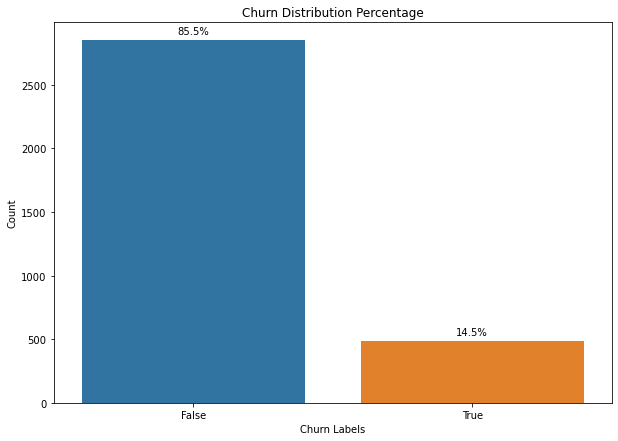

In [108]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df['churn'])
plt.title('Churn Distribution Percentage')
plt.xlabel('Churn Labels')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')
    
plt.show()

Insight: Severe class imbalance - Only 14.5% of customers churned while 85.5% of them still didn't. We'll need to address this during modeling (class weights, stratified sampling)

### Categorical Features Analysis. 

In this section, we examine how the categorical variables **international plan** and **voice mail plan** are related to churn behavior.  

We first create count plots that break down the number of churned vs. non-churned customers for each category. This visualizes whether having (or not having) an international or voice mail plan is linked to differences in churn outcomes.  

Next, we calculate the churn rates within each category using groupby and percentage normalization. This gives us a clearer, quantitative view of what percentage of customers churn in each group, helping us spot which features may be more predictive or relevant for churn. This combined visual and numeric approach strengthens our understanding of how these categorical factors influence churn.


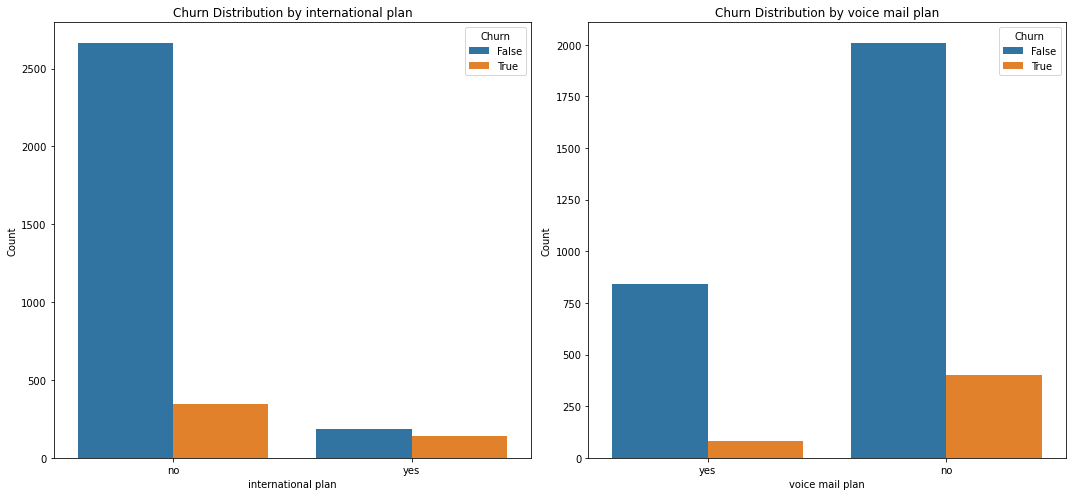


Churn Rates by international plan:


churn,False,True
international plan,,
no,88.504983,11.495017
yes,57.585139,42.414861



Churn Rates by voice mail plan:


churn,False,True
voice mail plan,,
no,83.284944,16.715056
yes,91.323210,8.676790


In [109]:
cat_cols = ['international plan', 'voice mail plan'] 

plt.figure(figsize=(15,7))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

# churn rates by category 
for col in cat_cols:
    churn_rate = df.groupby(col)['churn'].value_counts(normalize=True).mul(100).unstack()
    print(f"\nChurn Rates by {col}:")
    display(churn_rate)

#### Key Observations:

#### International Plan:

Customers with international plan: 42.4% churn rate

Without international plan: 11.4% churn rate

Conclusion - Having an international plan nearly quadruples churn risk!

#### Voice Mail Plan:

Customers with voice mail: 8.7% churn rate

Without voice mail: 16.7% churn rate

Voice mail subscribers are almost 50% less likely to churn

In [110]:
# Pie chart of area code feature
area = df['area code'].value_counts()
transuction = area.index
quantity = area.values

# draw pie circule with plotly
figure = px.pie(df,
               values = quantity,
               names = transuction,
               hole = .6,
               title = 'Distribution of Area Code Feature')
figure.show()

### Numerical Features Analysis
In this section, we explore how the numerical variables in the dataset are distributed and how they relate to churn.

We first plot histograms with density curves to understand the overall distribution (normal, skewed, etc.) for each numerical feature.

Then, we use boxplots grouped by churn status to visually compare differences in feature distributions between customers who churned and those who didn’t.

This helps identify which features show noticeable patterns or separations between churned and non-churned customers, guiding feature selection and engineering for modeling.

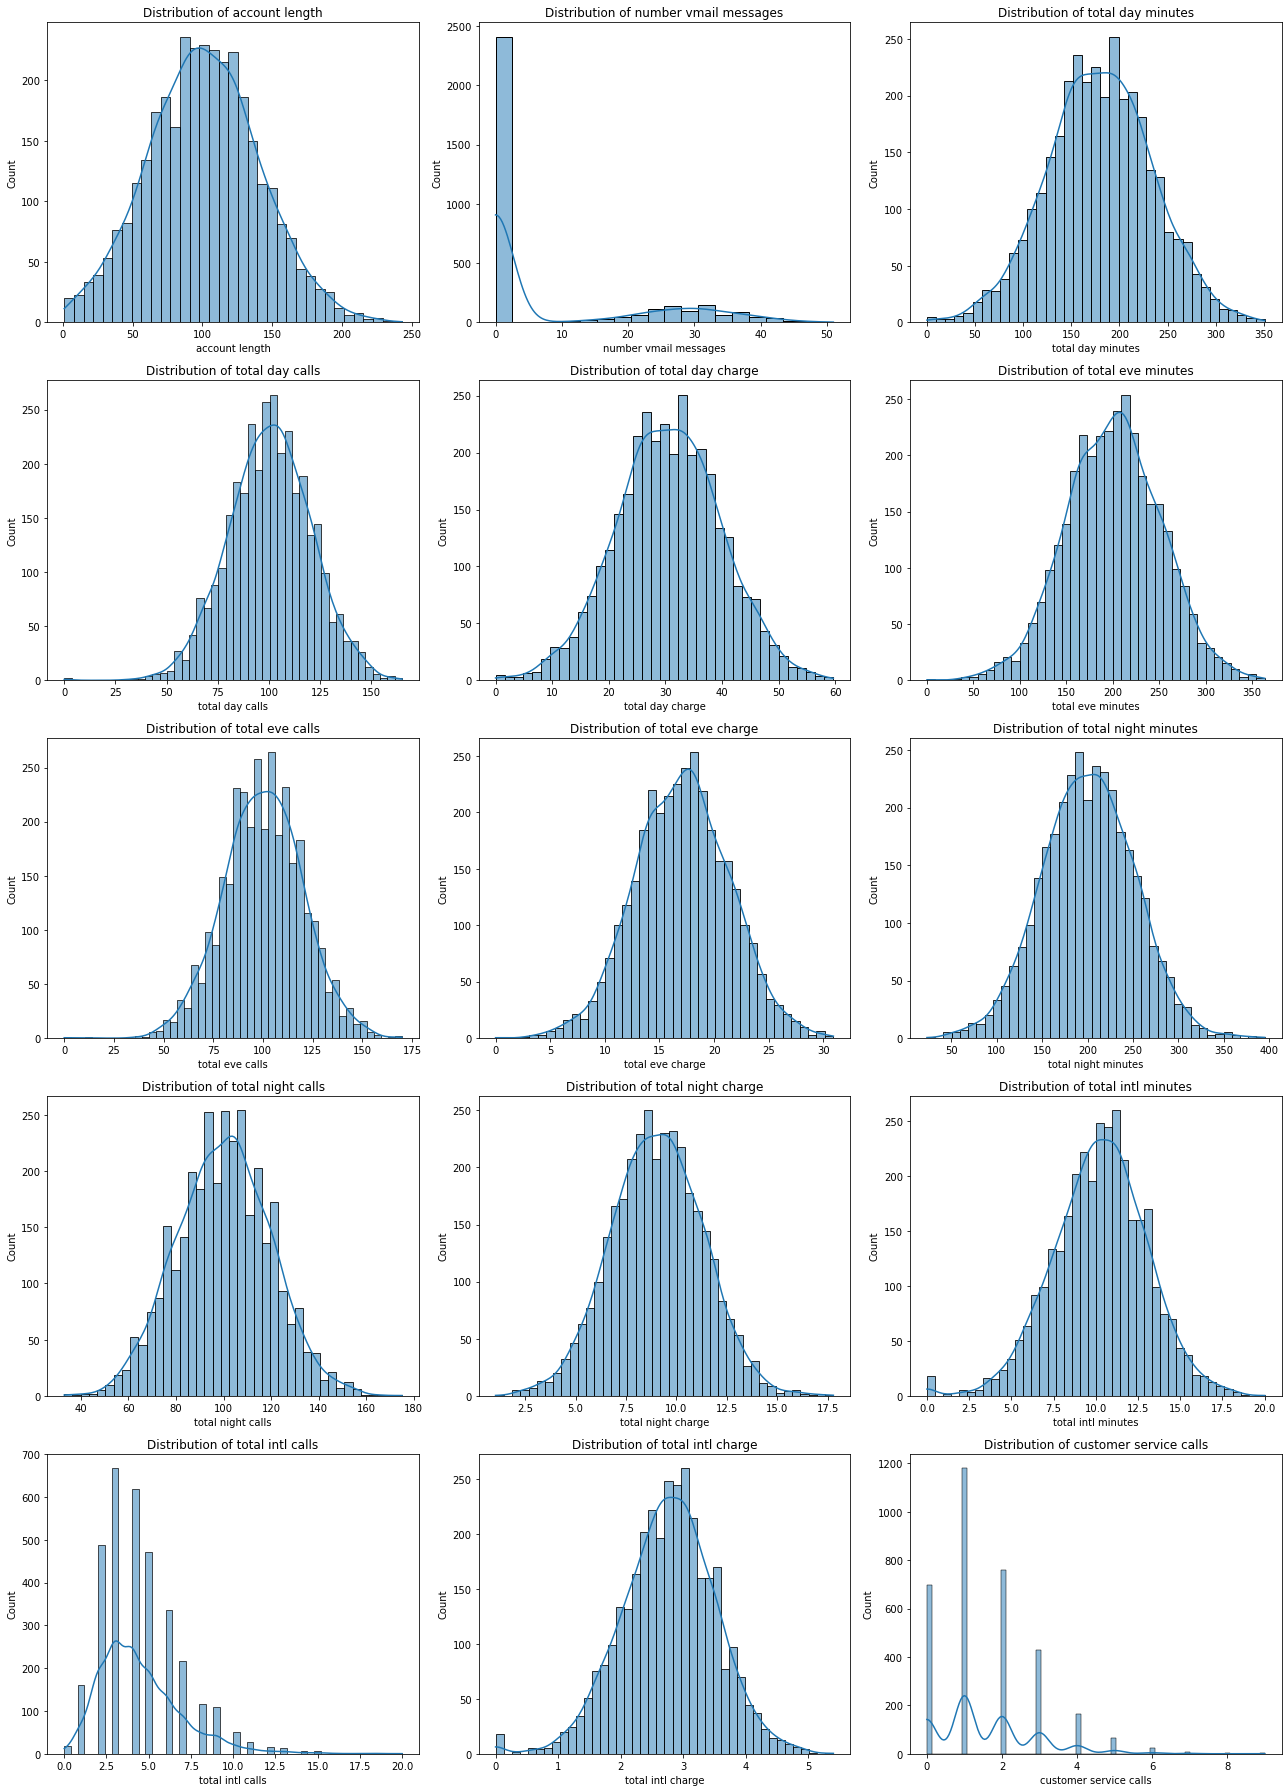

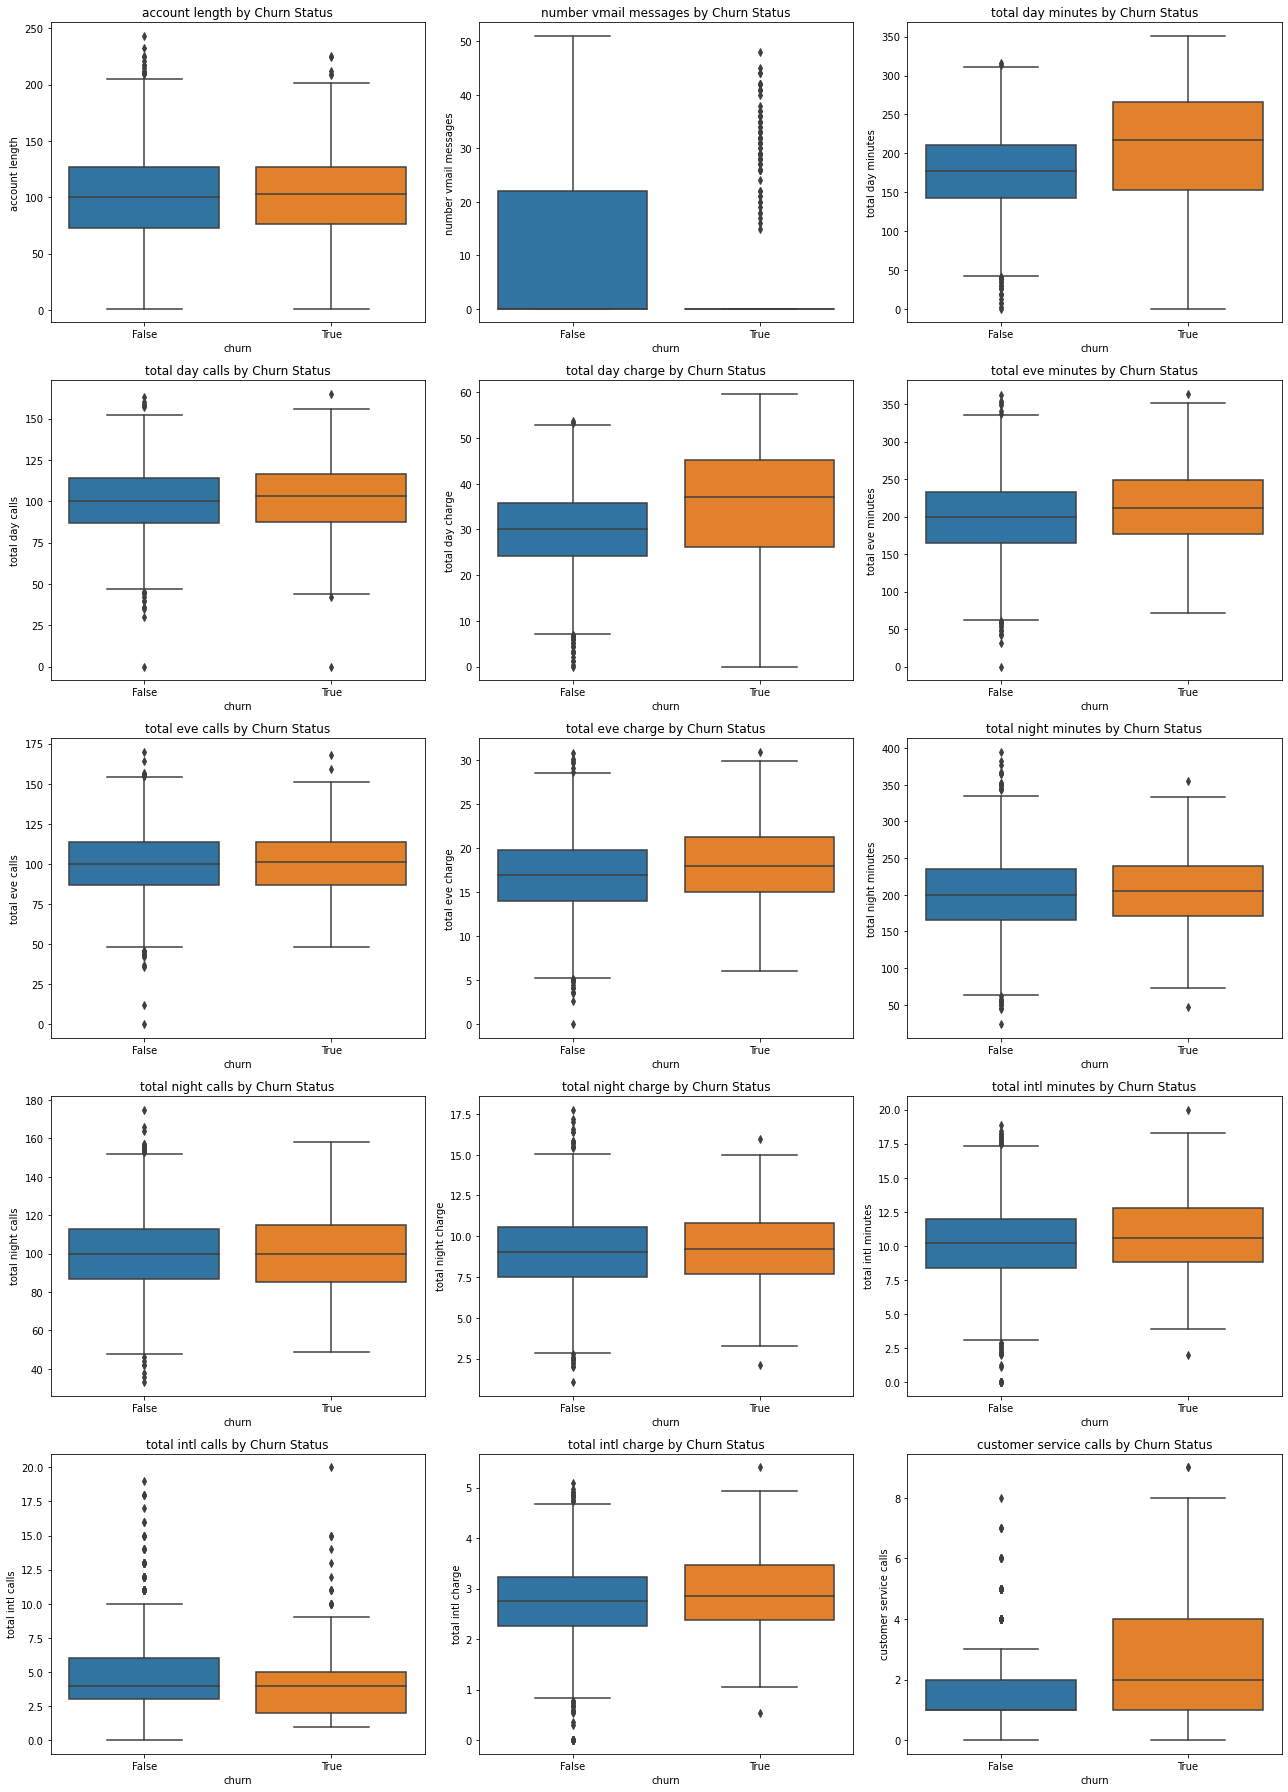

In [111]:
num_cols = ['account length', 'number vmail messages', 'total day minutes',
            'total day calls', 'total day charge', 'total eve minutes',
            'total eve calls', 'total eve charge', 'total night minutes',
            'total night calls', 'total night charge', 'total intl minutes',
            'total intl calls', 'total intl charge', 'customer service calls']

# Distribution plots
plt.figure(figsize=(18,25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Boxplots by churn status
plt.figure(figsize=(18,25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn Status')
    plt.tight_layout()
plt.show()

### Key Findings:

#### **Customer Service Calls**:

Churned customers have significantly more service calls (median=2 vs 1)

4+ service calls strongly correlate with churn

#### **Day/Evening/Night Charges**:

Churned customers have higher daytime charges

Night and evening usage shows less differentiation

#### **International Charges**:

Churned customers have slightly higher international charges

Consistent with international plan finding

#### **Account Length**:

Surprisingly similar distribution between churned and retained customers

Not a strong differentiator

### Correlation Analysis

In this step, we create a copy of the dataset and apply label encoding to convert categorical columns like churn, international plan, and voice mail plan into numeric values.
This allows us to compute a correlation matrix that shows how strongly each feature is related to the others.

We visualize the correlation matrix as a heatmap to easily spot which variables have strong positive or negative relationships.
Finally, we print out the features that show the strongest correlation with churn (above a threshold), helping us focus on the most relevant predictors for the modeling phase.

In [112]:
# Encode categorical variables for correlation
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['churn'] = le.fit_transform(df['churn'])
df_encoded['international plan'] = le.fit_transform(df['international plan'])
df_encoded['voice mail plan'] = le.fit_transform(df['voice mail plan'])

df_encoded.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


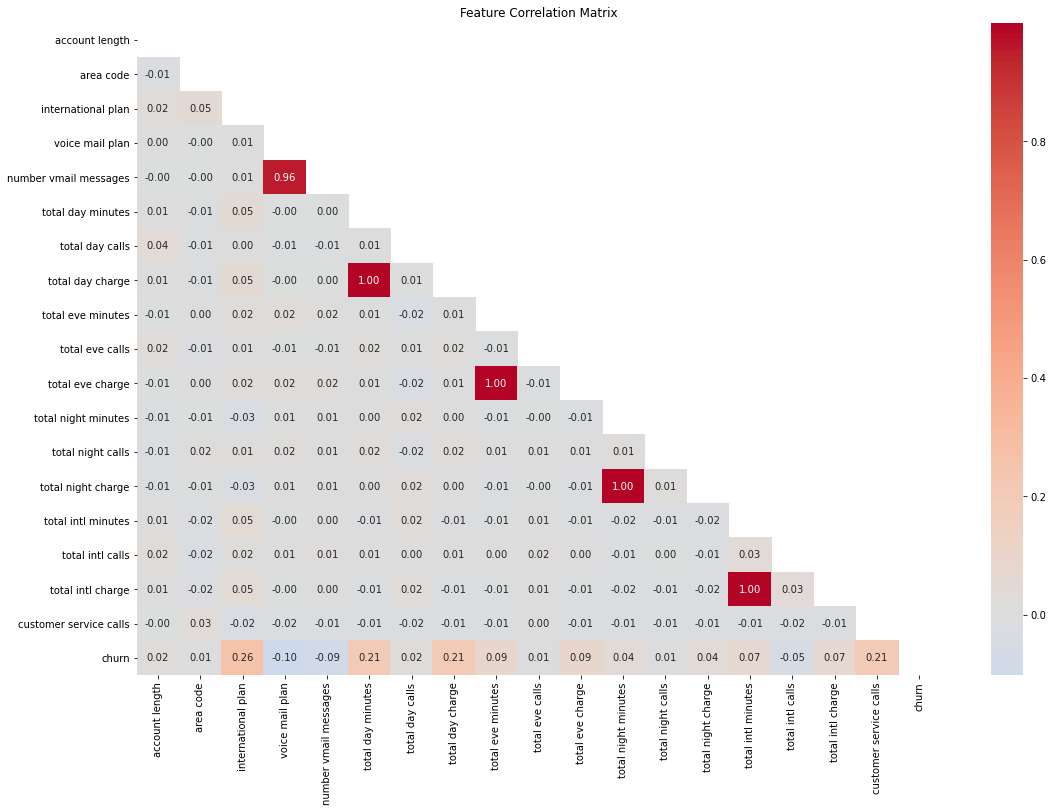

Top Correlations with Churn:
churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


In [113]:
# Correlation matrix
plt.figure(figsize=(18,12))
corr = df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Top correlations with churn
churn_corr = corr['churn'].sort_values(ascending=False)
print("Top Correlations with Churn:")
print(churn_corr[abs(churn_corr) > 0.05])

### Insights:

**Churn has a strong positive correlation with**:

International plan (0.26)

Customer service calls (0.26)

Daytime charges (0.21)

**Strong negative correlation**:

Voice mail plan (-0.16)

**Multicollinearity notes**:

Charges are perfectly correlated with minutes (expected since charge = minutes * rate)

We should drop redundant charge columns during modeling